In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
n=10
eps=0.2

In [14]:
def get_reward(prob, n=10):
  reward=0
  for i in range(n):
    if random.random() < prob:
      reward+=1
  return reward

In [15]:
reward_test= [get_reward(0.8) for _ in range(2000)]

In [16]:
np.mean(reward_test)

np.float64(7.9725)

(array([  1.,   1.,   2.,  12.,  43., 195., 426., 582., 515., 223.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

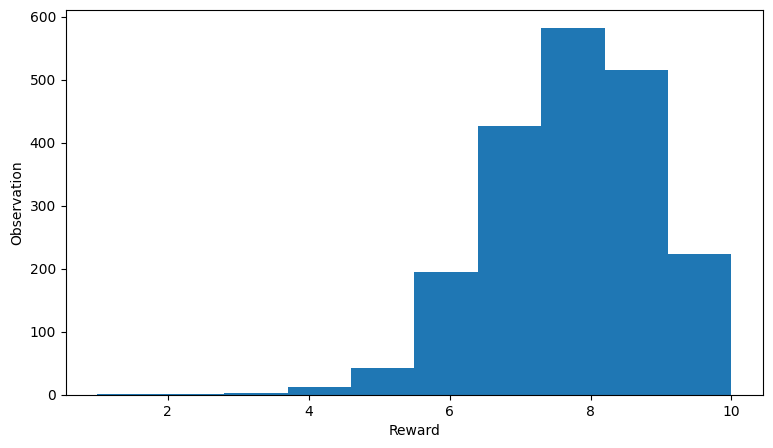

In [17]:
plt.figure(figsize=(9, 5))
plt.xlabel("Reward")
plt.ylabel("Observation")
plt.hist(reward_test, bins=10)

In [18]:
record=np.zeros((n, 2)) # n rows, 2 cols where first cols: no of arms pulled and 2nd cols the avg reward

In [19]:
def get_best_arm(record):
  arm_index=np.argmax(record[:, 1], axis=0)
  return arm_index

def update_record(record, action, r):
  new_r=(record[action, 0] * record[action, 1] + r) / (record[action, 0]+1)
  record[action, 0]+=1
  record[action, 1]=new_r
  return record


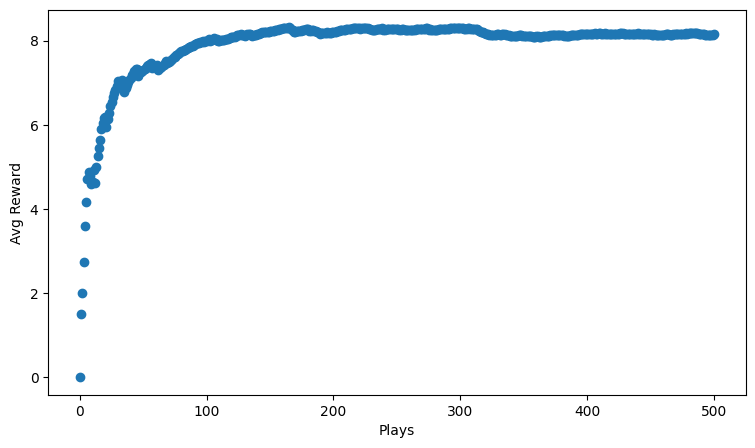

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
probs=np.random.rand(n)

for i in range(500):
  if random.random() > eps:
    choice=get_best_arm(record) #exploitation
  else:
    choice=np.random.randint(10) #exploration
  r=get_reward(probs[choice])
  record=update_record(record, choice, r)
  mean_reward=((i+1) * rewards[-1]+r)/(i+2)
  rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)
